# Consensus Non-negative Matrix factorization (cNMF)

cNMF is an analysis pipeline for inferring gene expression programs from single-cell RNA-Seq (scRNA-Seq) data.

It takes a count matrix (N cells X G genes) as input and produces a (K x G) matrix of gene expression programs (GEPs) and a (N x K) matrix specifying the usage of each program for each cell in the data. You can read more about the method in the [github](https://github.com/dylkot/cNMF) and check out examples on dentategyrus.

In [2]:
import scanpy as sc
import omicverse as ov
ov.plot_set(font_path='Arial')
!date

🔬 Starting plot initialization...
Using already downloaded Arial font from: /tmp/omicverse_arial.ttf
Registered as: Arial
🧬 Detecting CUDA devices…
✅ [GPU 0] NVIDIA GeForce RTX 2080 Ti
    • Total memory: 10.7 GB
    • Compute capability: 7.5
✅ [GPU 1] NVIDIA GeForce RTX 2080 Ti
    • Total memory: 10.7 GB
    • Compute capability: 7.5

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

🔖 Version: 1.7.6rc1   📚 Tutorials: https://omicverse.readthedocs.io/
✅ plot_set complete.

2025年 08月 05日 星期二 11:33:43 CST


## Loading dataset

Here, we use the dentategyrus dataset as an example for cNMF.

In [3]:
import scvelo as scv
adata=scv.datasets.dentategyrus()

In [4]:
%%time
adata=ov.pp.preprocess(adata,mode='shiftlog|pearson',n_HVGs=2000,)
adata

Begin robust gene identification
After filtration, 13264/13913 genes are kept.     Among 13264 genes, 13189 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell
The following highly-expressed genes are not considered during normalization factor computation:
['Hba-a1', 'Malat1', 'Ptgds', 'Hbb-bt']
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
Time to analyze data in cpu: 0.6751010417938232 seconds.
End of size normalization: shiftlog and HVGs selection pearson
CPU times: user 4.06 s, sys: 329 ms, total: 4.39 s
Wall time: 933 ms


AnnData object with n_obs × n_vars = 2930 × 13189
    obs: 'clusters', 'age(days)', 'clusters_enlarged'
    var: 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'clusters_colors', 'log1p', 'hvg', 'status', 'status_args', 'REFERENCE_MANU'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced', 'counts'

In [5]:
ov.pp.scale(adata)
ov.pp.pca(adata)

computing PCA
    with n_comps=50
    finished (0:00:06)


<Axes: title={'center': 'Celltypes'}, xlabel='X_umap1', ylabel='X_umap2'>

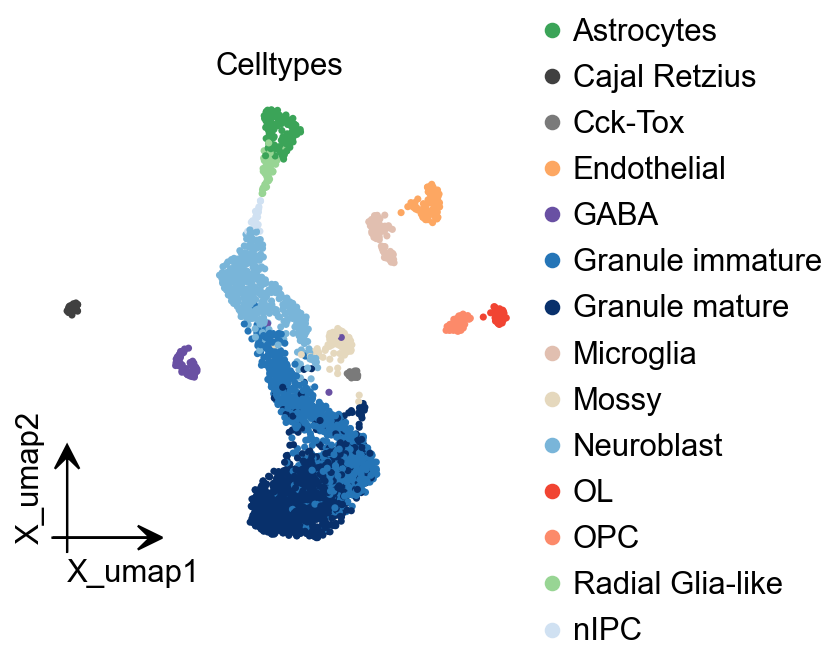

In [6]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
fig, ax = plt.subplots(figsize=(4,4))
ov.pl.embedding(
    adata,
    basis="X_umap",
    color=['clusters'],
    frameon='small',
    title="Celltypes",
    #legend_loc='on data',
    legend_fontsize=14,
    legend_fontoutline=2,
    #size=10,
    ax=ax,
    #legend_loc=True, 
    add_outline=False, 
    #add_outline=True,
    outline_color='black',
    outline_width=1,
    show=False,
)

## Initialize and Training model

In [7]:
import numpy as np
## Initialize the cnmf object that will be used to run analyses
cnmf_obj = ov.single.cNMF(adata,components=np.arange(5,11), n_iter=20, seed=14, num_highvar_genes=2000,
                          output_dir='example_dg/cNMF', name='dg_cNMF')

normalizing counts per cell
    finished (0:00:00)


In [8]:
## Specify that the jobs are being distributed over a single worker (total_workers=1) and then launch that worker
cnmf_obj.factorize(worker_i=0, total_workers=2)

60it [00:20,  2.88it/s]


In [9]:
cnmf_obj.combine(skip_missing_files=True)

Combining factorizations for k=5.
Missing file: example_dg/cNMF/dg_cNMF/cnmf_tmp/dg_cNMF.spectra.k_5.iter_1.df.npz. Skipping.
Missing file: example_dg/cNMF/dg_cNMF/cnmf_tmp/dg_cNMF.spectra.k_5.iter_3.df.npz. Skipping.
Missing file: example_dg/cNMF/dg_cNMF/cnmf_tmp/dg_cNMF.spectra.k_5.iter_5.df.npz. Skipping.
Missing file: example_dg/cNMF/dg_cNMF/cnmf_tmp/dg_cNMF.spectra.k_5.iter_7.df.npz. Skipping.
Missing file: example_dg/cNMF/dg_cNMF/cnmf_tmp/dg_cNMF.spectra.k_5.iter_9.df.npz. Skipping.
Missing file: example_dg/cNMF/dg_cNMF/cnmf_tmp/dg_cNMF.spectra.k_5.iter_11.df.npz. Skipping.
Missing file: example_dg/cNMF/dg_cNMF/cnmf_tmp/dg_cNMF.spectra.k_5.iter_13.df.npz. Skipping.
Missing file: example_dg/cNMF/dg_cNMF/cnmf_tmp/dg_cNMF.spectra.k_5.iter_15.df.npz. Skipping.
Missing file: example_dg/cNMF/dg_cNMF/cnmf_tmp/dg_cNMF.spectra.k_5.iter_17.df.npz. Skipping.
Missing file: example_dg/cNMF/dg_cNMF/cnmf_tmp/dg_cNMF.spectra.k_5.iter_19.df.npz. Skipping.
Combining factorizations for k=6.
Missing

## Compute the stability and error at each choice of K to see if a clear choice jumps out.

Please note that the maximum stability solution is not always the best choice depending on the application. However it is often a good starting point even if you have to investigate several choices of K

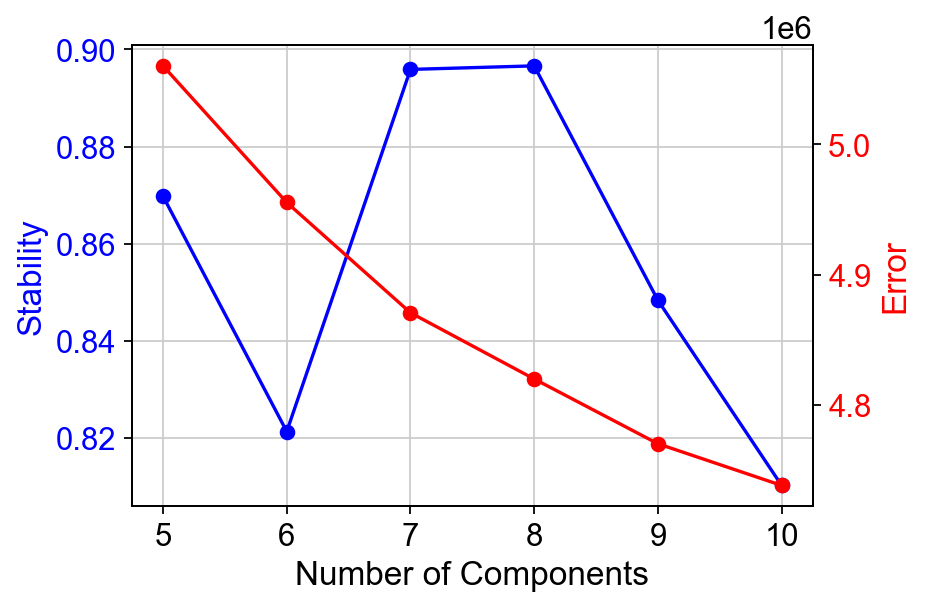

In [10]:
cnmf_obj.k_selection_plot(close_fig=False)

In this range, K=7 gave the most stable solution so we will begin by looking at that.

The next step computes the consensus solution for a given choice of K. We first run it without any outlier filtering to see what that looks like. Setting the density threshold to anything >= 2.00 (the maximum possible distance between two unit vectors) ensures that nothing will be filtered.

Then we run the consensus with a filter for outliers determined based on inspecting the histogram of distances between components and their nearest neighbors

In [11]:
selected_K = 7
density_threshold = 2.00

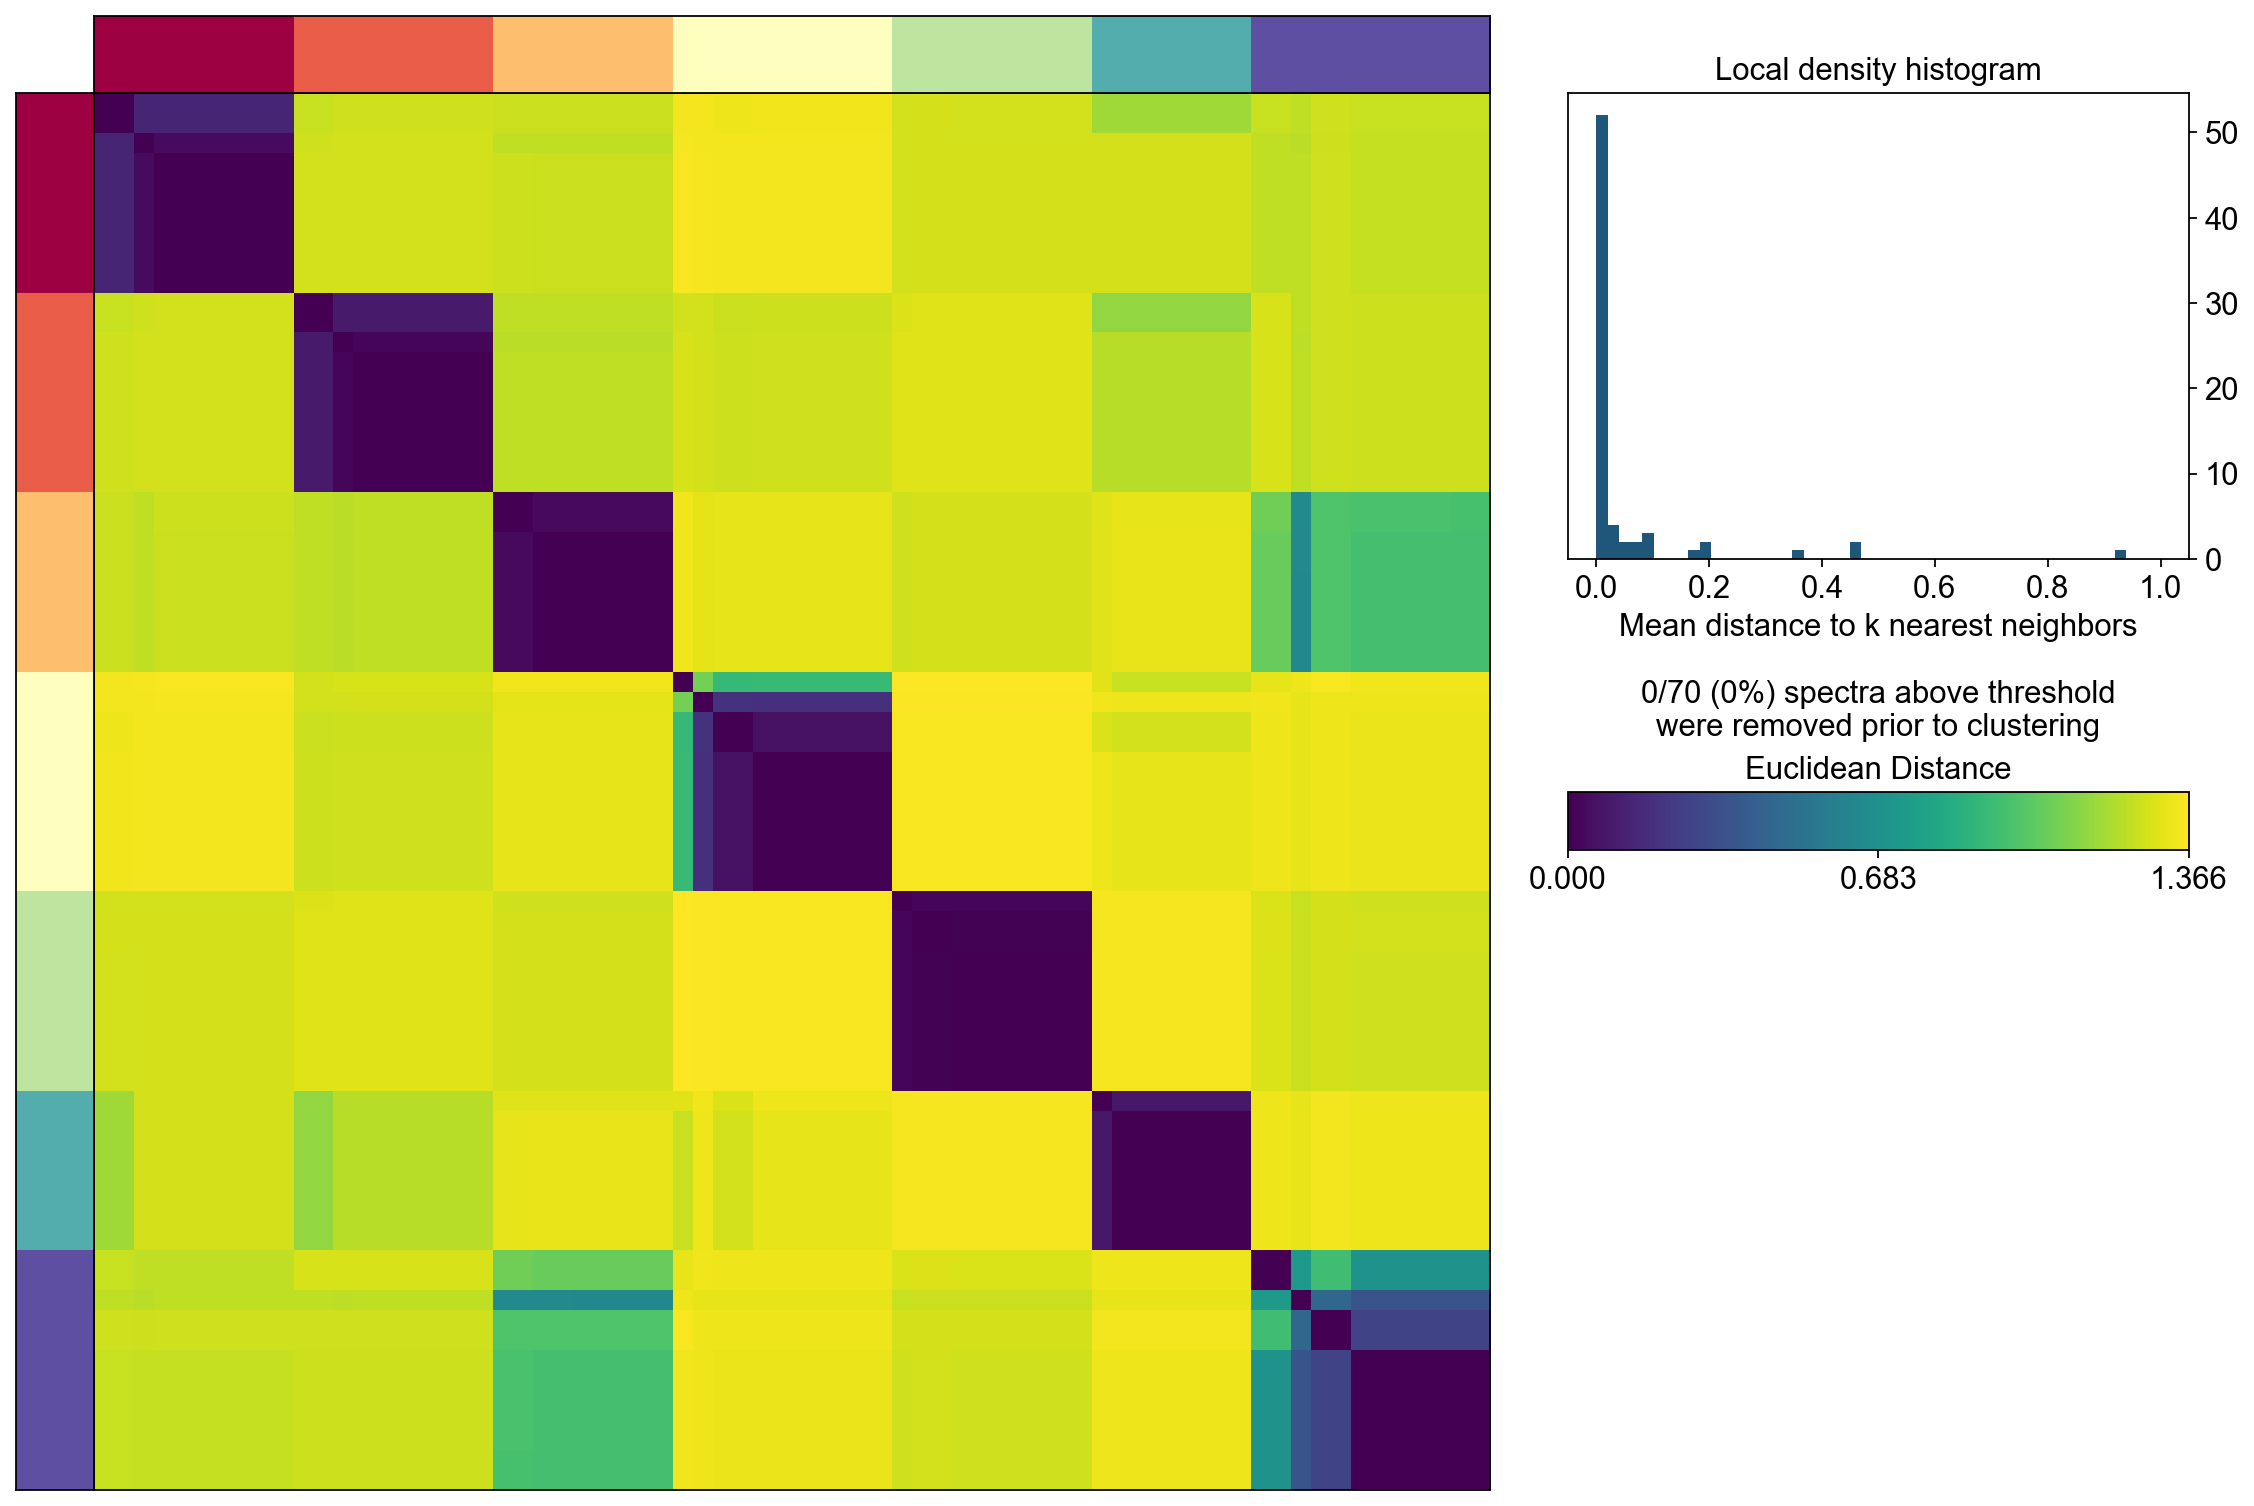

In [12]:
cnmf_obj.consensus(k=selected_K, 
                   density_threshold=density_threshold, 
                   show_clustering=True, 
                   close_clustergram_fig=False)

The above consensus plot shows that there is a substantial degree of concordance between the replicates with a few outliers. An outlier threshold of 0.1 seems appropriate

In [13]:
density_threshold = 0.10

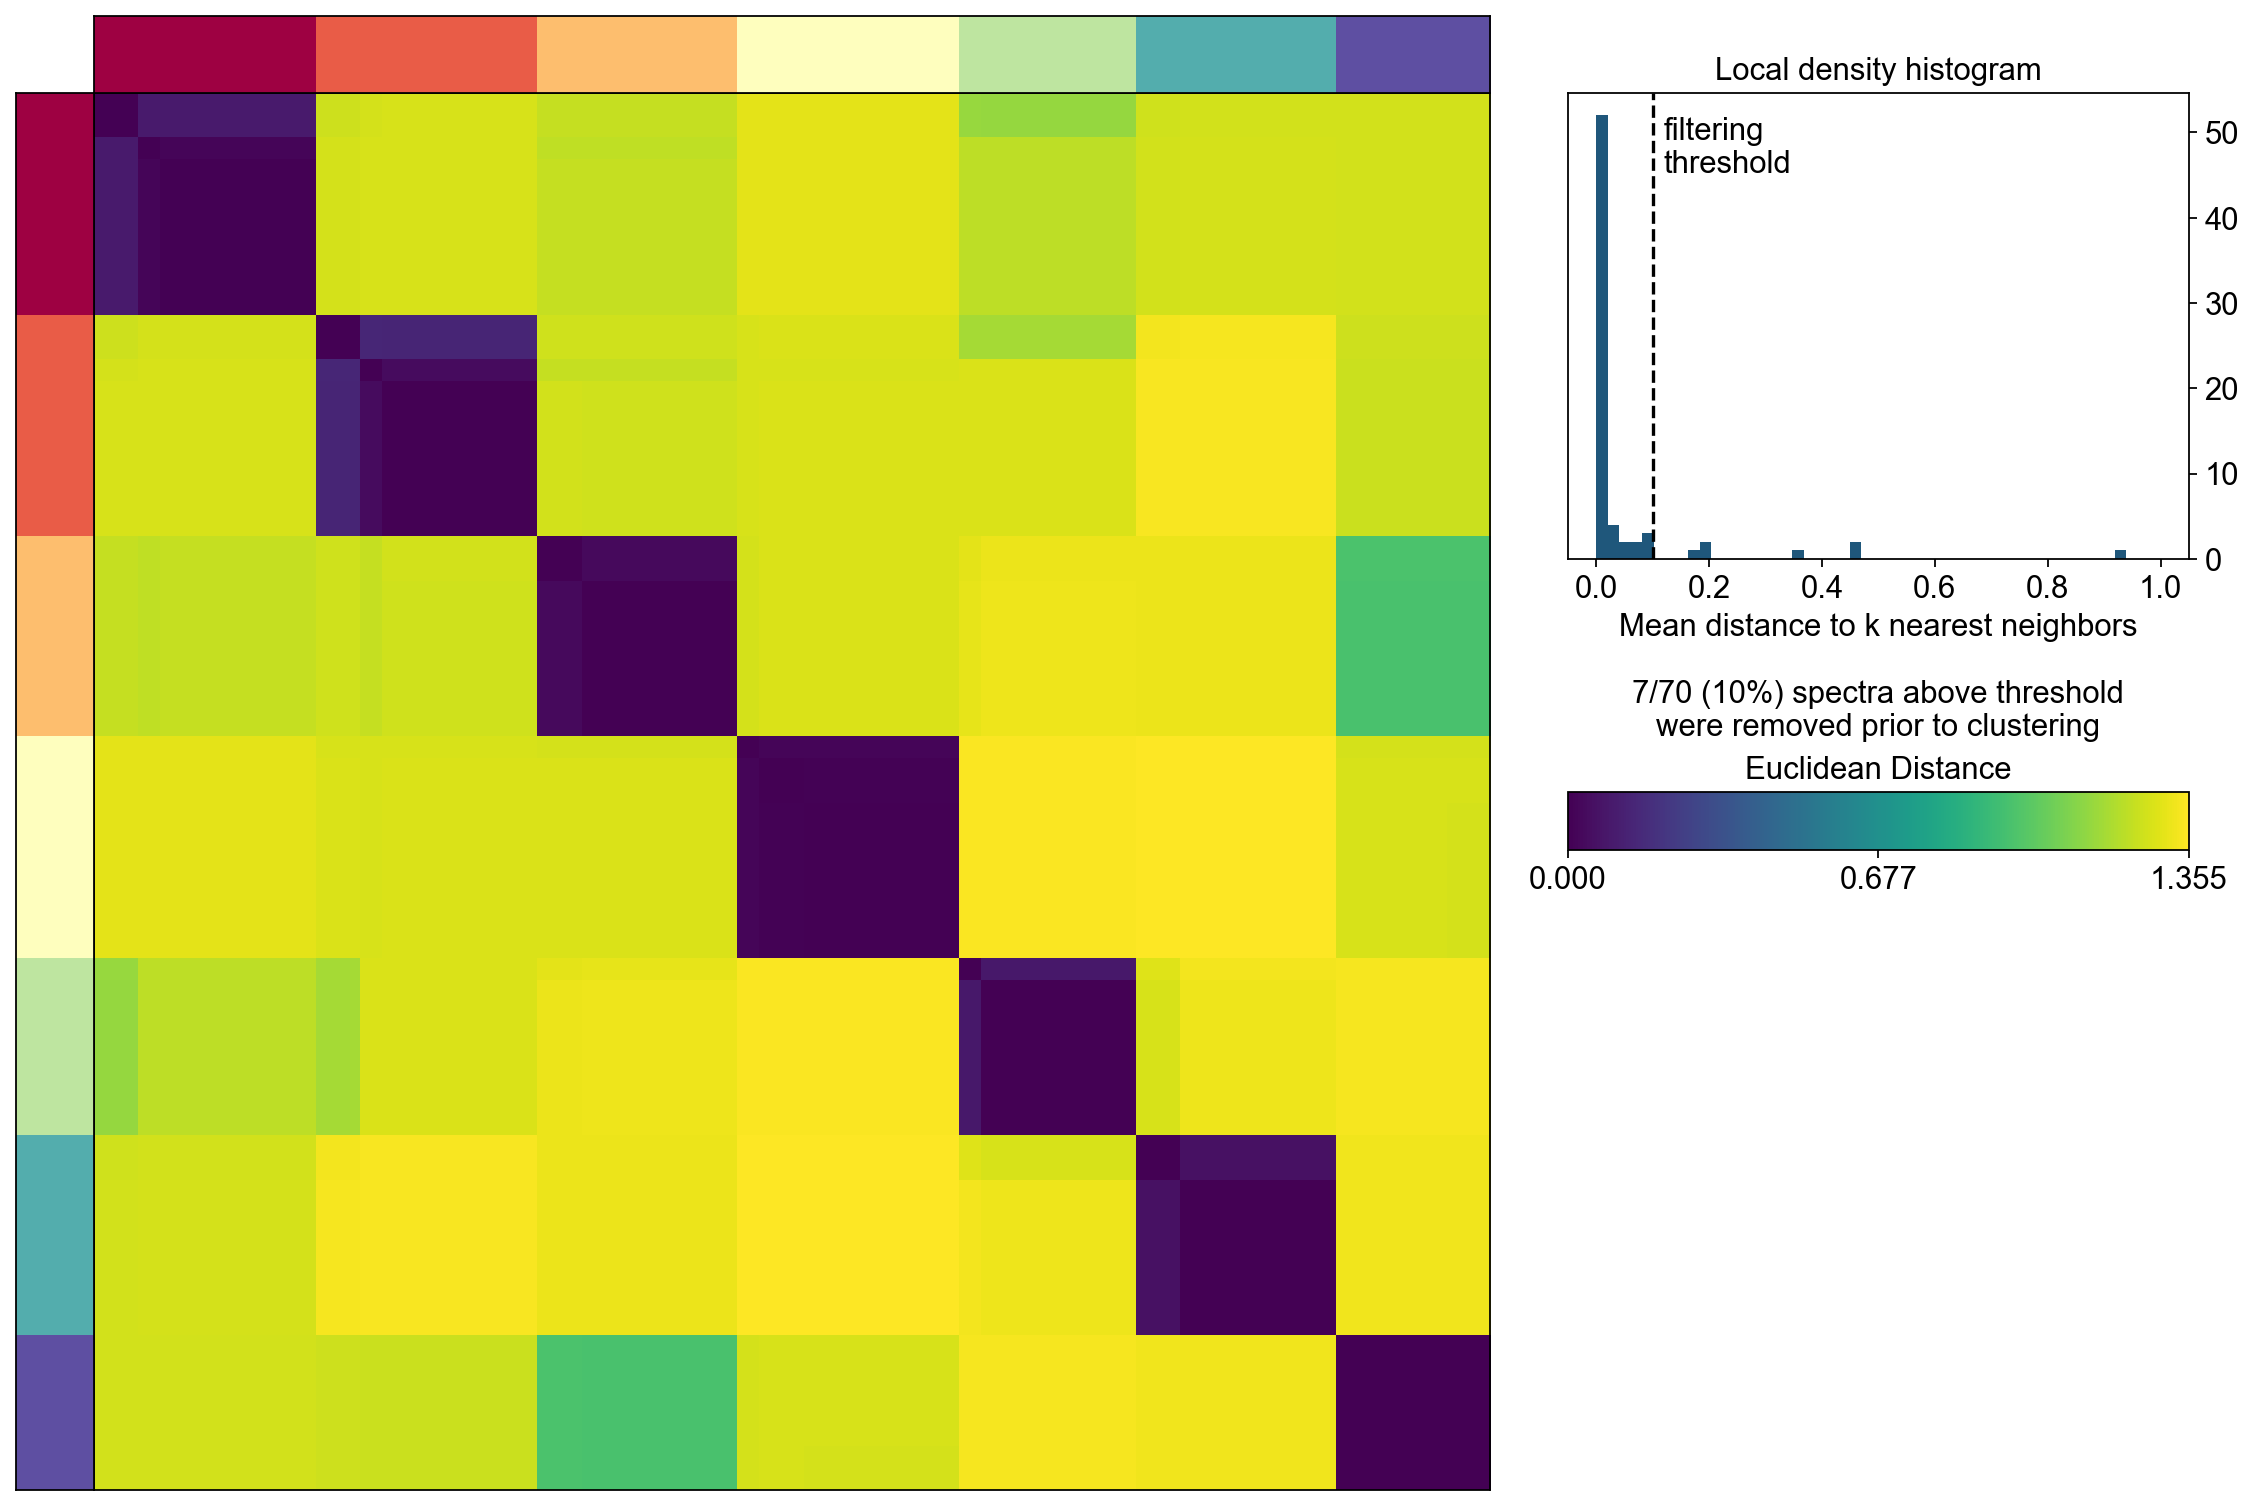

In [14]:
cnmf_obj.consensus(k=selected_K, 
                   density_threshold=density_threshold, 
                   show_clustering=True, 
                   close_clustergram_fig=False)

## Visualization the result

[Text(1, 0.0, '0.000'),
 Text(1, 0.6773954033851624, '0.677'),
 Text(1, 1.3547908067703247, '1.355')]

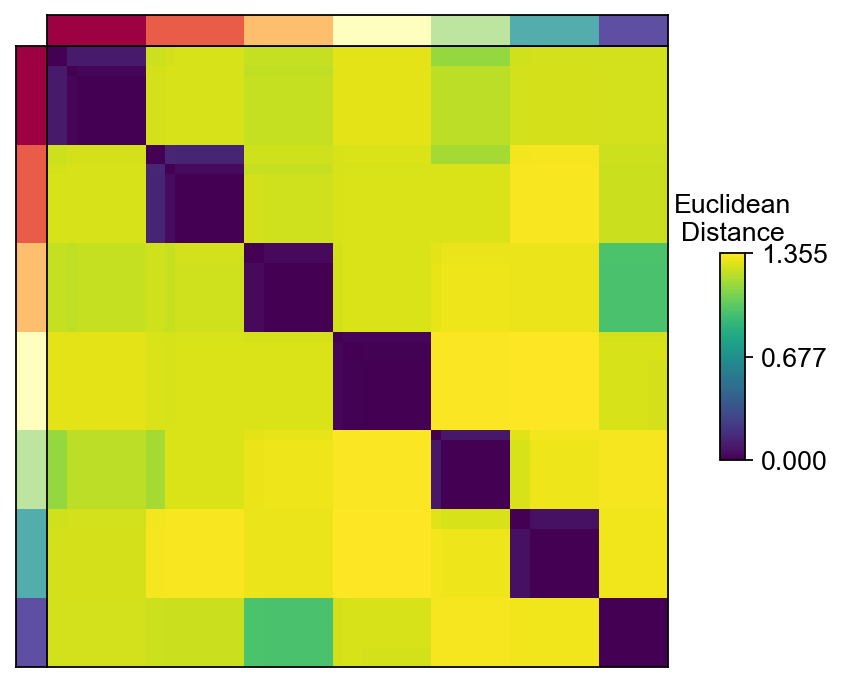

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import patheffects

from matplotlib import gridspec
import matplotlib.pyplot as plt

width_ratios = [0.2, 4, 0.5, 10, 1]
height_ratios = [0.2, 4]
fig = plt.figure(figsize=(sum(width_ratios), sum(height_ratios)))
gs = gridspec.GridSpec(len(height_ratios), len(width_ratios), fig,
                        0.01, 0.01, 0.98, 0.98,
                       height_ratios=height_ratios,
                       width_ratios=width_ratios,
                       wspace=0, hspace=0)
            
D = cnmf_obj.topic_dist[cnmf_obj.spectra_order, :][:, cnmf_obj.spectra_order]
dist_ax = fig.add_subplot(gs[1,1], xscale='linear', yscale='linear',
                                      xticks=[], yticks=[],xlabel='', ylabel='',
                                      frameon=True)
dist_im = dist_ax.imshow(D, interpolation='none', cmap='viridis',
                         aspect='auto', rasterized=True)

left_ax = fig.add_subplot(gs[1,0], xscale='linear', yscale='linear', xticks=[], yticks=[],
                xlabel='', ylabel='', frameon=True)
left_ax.imshow(cnmf_obj.kmeans_cluster_labels.values[cnmf_obj.spectra_order].reshape(-1, 1),
                            interpolation='none', cmap='Spectral', aspect='auto',
                            rasterized=True)

top_ax = fig.add_subplot(gs[0,1], xscale='linear', yscale='linear', xticks=[], yticks=[],
                xlabel='', ylabel='', frameon=True)
top_ax.imshow(cnmf_obj.kmeans_cluster_labels.values[cnmf_obj.spectra_order].reshape(1, -1),
                  interpolation='none', cmap='Spectral', aspect='auto',
                    rasterized=True)

cbar_gs = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs[1, 2],
                                   wspace=0, hspace=0)
cbar_ax = fig.add_subplot(cbar_gs[1,2], xscale='linear', yscale='linear',
    xlabel='', ylabel='', frameon=True, title='Euclidean\nDistance')
cbar_ax.set_title('Euclidean\nDistance',fontsize=12)
vmin = D.min().min()
vmax = D.max().max()
fig.colorbar(dist_im, cax=cbar_ax,
        ticks=np.linspace(vmin, vmax, 3),
        )
cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(),fontsize=12)

Text(0.5, 1.0, 'Local density histogram')

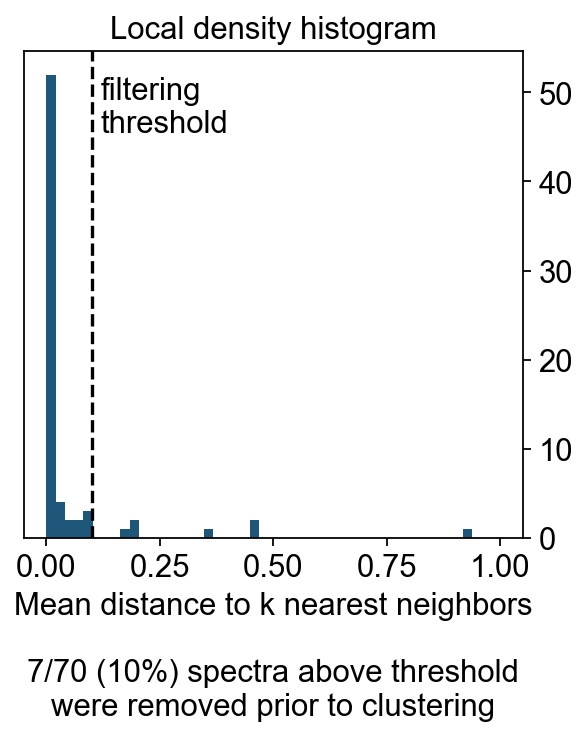

In [16]:
density_filter = cnmf_obj.local_density.iloc[:, 0] < density_threshold
fig, hist_ax = plt.subplots(figsize=(4,4))

#hist_ax = fig.add_subplot(hist_gs[0,0], xscale='linear', yscale='linear',
 #   xlabel='', ylabel='', frameon=True, title='Local density histogram')
hist_ax.hist(cnmf_obj.local_density.values, bins=np.linspace(0, 1, 50))
hist_ax.yaxis.tick_right()

xlim = hist_ax.get_xlim()
ylim = hist_ax.get_ylim()
if density_threshold < xlim[1]:
    hist_ax.axvline(density_threshold, linestyle='--', color='k')
    hist_ax.text(density_threshold  + 0.02, ylim[1] * 0.95, 'filtering\nthreshold\n\n', va='top')
hist_ax.set_xlim(xlim)
hist_ax.set_xlabel('Mean distance to k nearest neighbors\n\n%d/%d (%.0f%%) spectra above threshold\nwere removed prior to clustering'%(sum(~density_filter), len(density_filter), 100*(~density_filter).mean()))
hist_ax.set_title('Local density histogram')

## Explode the cNMF result

We can load the results for a cNMF run with a given K and density filtering threshold like below

In [17]:
result_dict = cnmf_obj.load_results(K=selected_K, density_threshold=density_threshold)


In [18]:
result_dict['usage_norm'].head()

,cNMF_1,cNMF_2,cNMF_3,cNMF_4,cNMF_5,cNMF_6,cNMF_7
index,,,,,,,
AAACATACCCATGA,0.915404,0.069192,0.002803,0.005676,0.005734,0.001166,0.000023
AAACATACCGTAGT,0.000000,0.302637,0.544499,0.023995,0.061296,0.023021,0.044552
AAACATACGAGAGC,0.826753,0.123350,0.000000,0.004962,0.022070,0.022865,0.000000
AAACATACTGAGGG,0.420218,0.571263,0.000000,0.000000,0.008519,0.000000,0.000000
AAACATTGGCATCA,0.884677,0.109644,0.003339,0.002339,0.000000,0.000000,0.000000


In [19]:
result_dict['gep_scores'].head()

,1,2,3,4,5,6,7
Lypla1,-0.000012,-0.000070,-0.000095,0.000215,0.000309,-0.000071,0.000432
Tcea1,-0.000211,-0.000096,0.001432,-0.000163,-0.000086,-0.000175,-0.000141
Atp6v1h,0.000046,0.000319,-0.000197,0.000009,0.000036,-0.000166,-0.000201
Rb1cc1,0.000136,-0.000220,-0.000148,-0.000243,-0.000111,-0.000225,-0.000147
St18,0.000120,-0.000202,-0.000154,-0.000125,-0.000053,0.000151,-0.000080


In [20]:
result_dict['gep_tpm'].head()

,1,2,3,4,5,6,7
Lypla1,1.018506,0.315280,0.000000,6.557766,7.047085,0.000000,26.283978
Tcea1,32.752003,27.857220,256.665470,21.675758,23.528505,9.986502,28.140295
Atp6v1h,40.224720,59.087143,26.300707,36.507977,57.922300,20.176945,0.000000
Rb1cc1,127.721600,58.913060,56.265910,24.845037,24.921837,29.293661,31.539022
St18,15.201350,0.000000,0.000000,0.000000,0.000000,25.262638,0.000000


In [21]:
result_dict['top_genes'].head()

,1,2,3,4,5,6,7
0,Sepw1,Tubb2b,Atp1a2,Lgmn,Cldn5,Cldn11,Pcolce
1,Slc17a7,Tuba1b,Slc1a2,C1qa,Esam,Plp1,Col1a2
2,Ndrg4,Tuba1a,Mlc1,Tyrobp,Bsg,Mbp,Col1a1
3,Snca,Tmsb10,Prdx6,C1qc,Cd34,Mog,Igf2
4,Sncb,Tubb5,Aldoc,C1qb,Srgn,Mag,Slc6a13


We can extract cell classes directly based on the highest cNMF in each cell, but this has the disadvantage that it will lead to mixed cell classes if the heterogeneity of our data is not as strong as it should be.

In [22]:
cnmf_obj.get_results(adata,result_dict)

cNMF_cluster is added to adata.obs
gene scores are added to adata.var


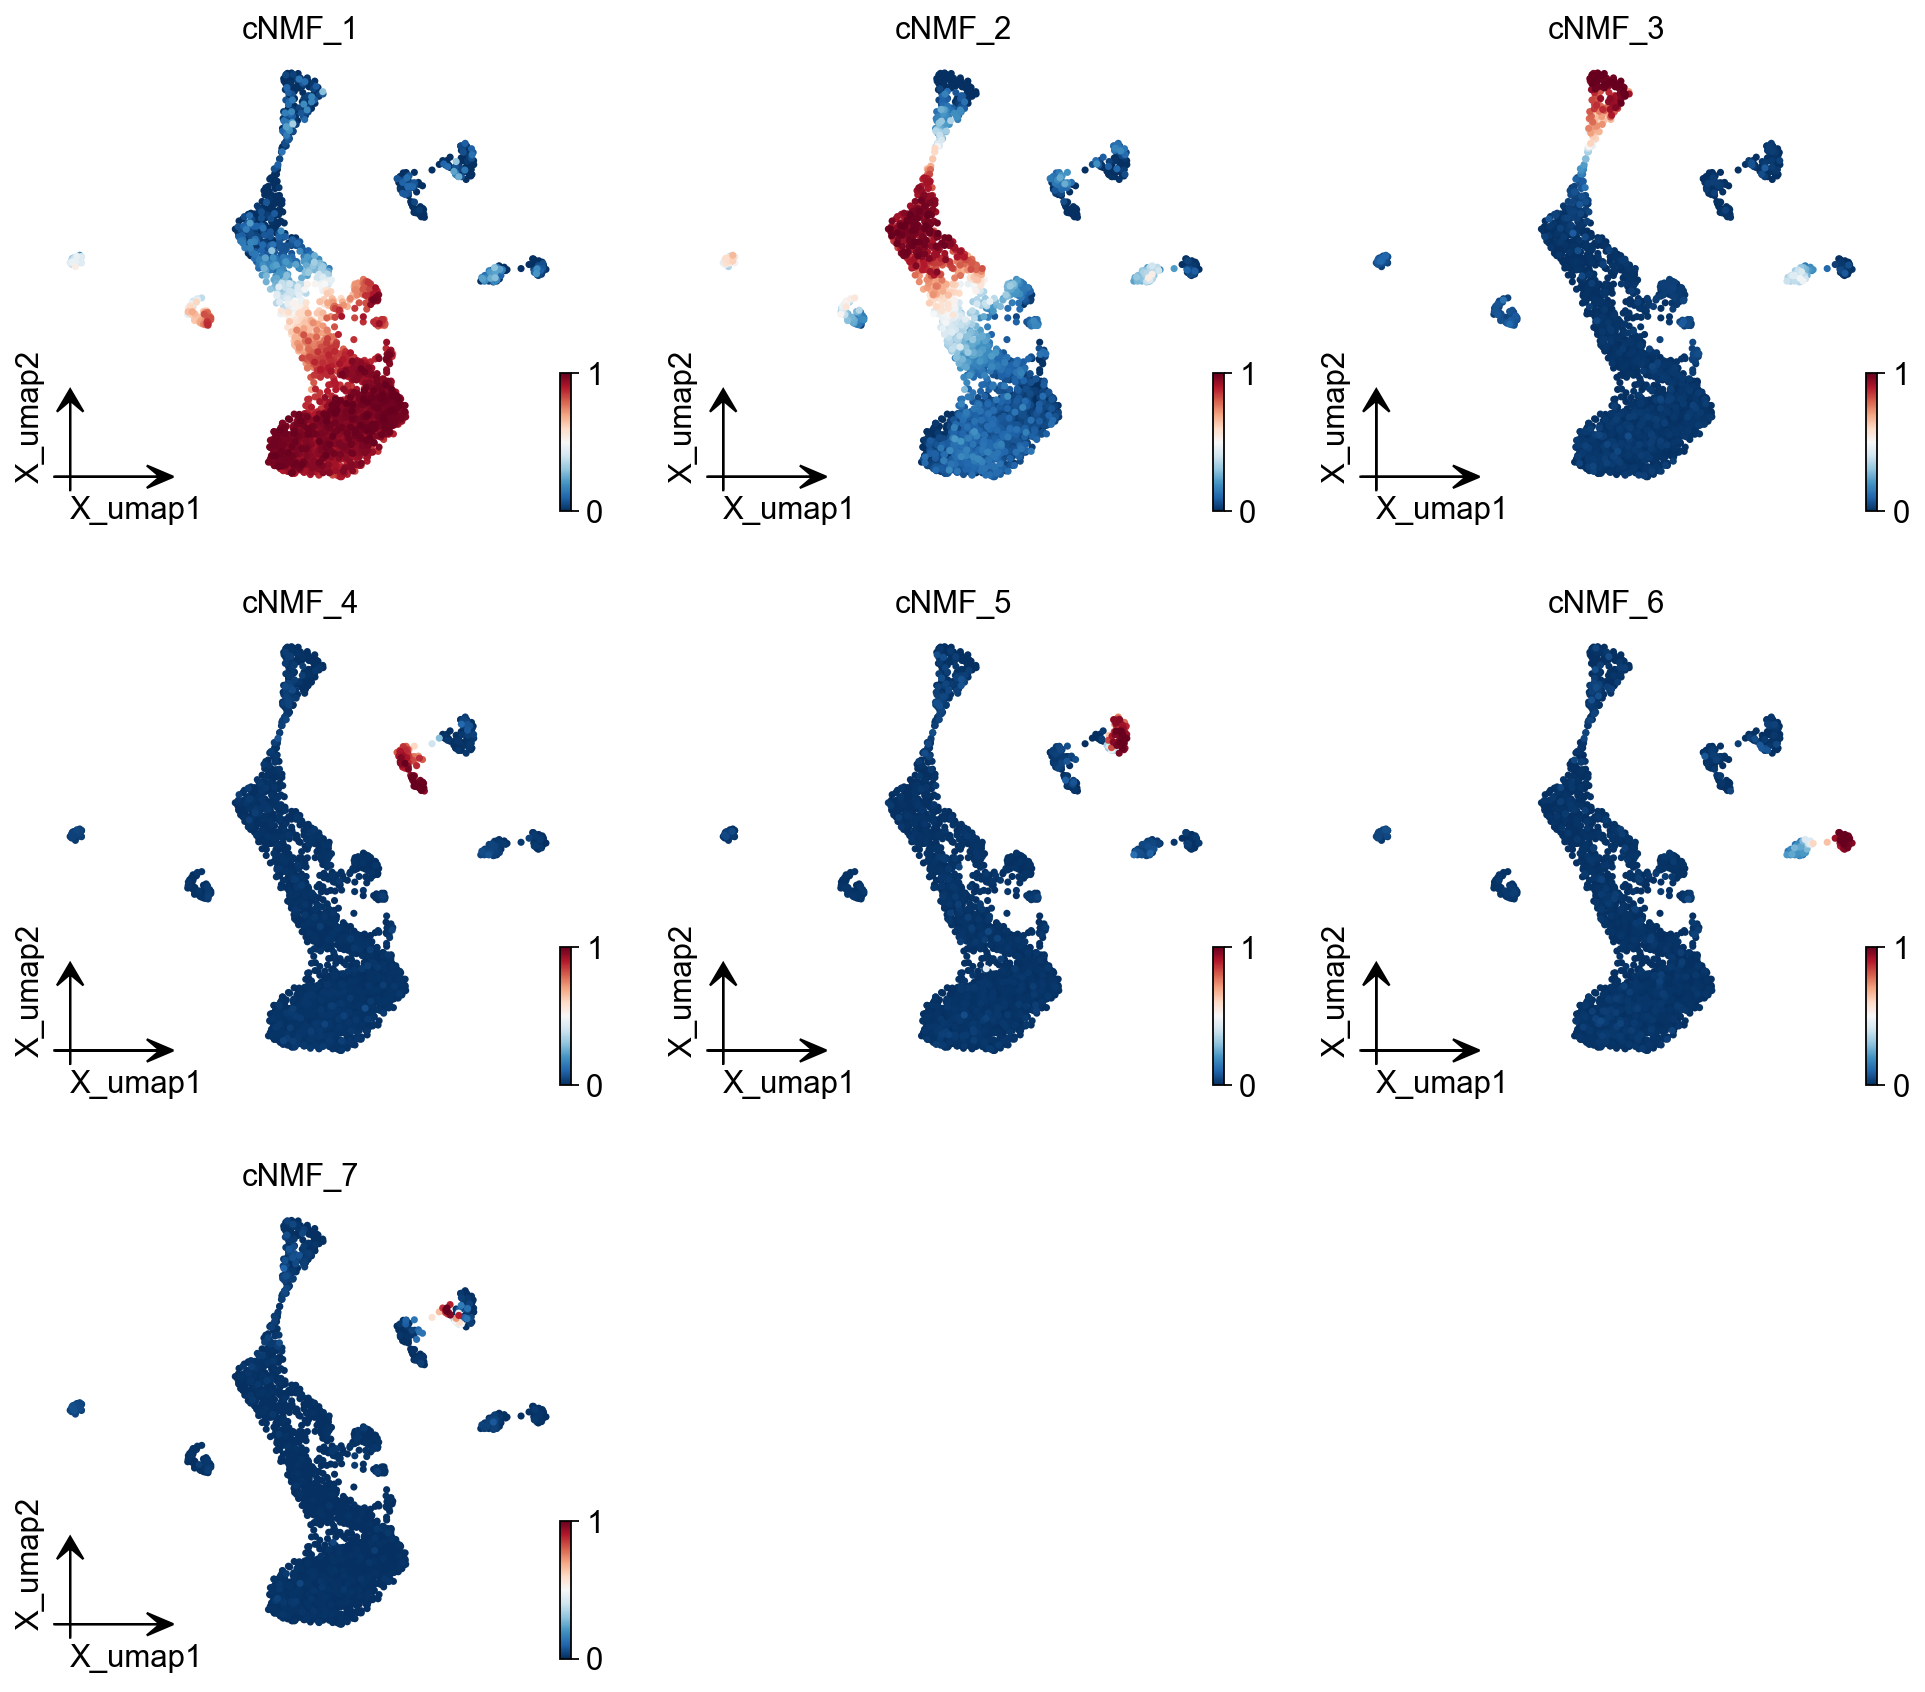

In [23]:
ov.pl.embedding(adata, basis='X_umap',color=result_dict['usage_norm'].columns,
           use_raw=False, ncols=3, vmin=0, vmax=1,frameon='small')

<Axes: title={'center': 'cNMF_cluster'}, xlabel='X_umap1', ylabel='X_umap2'>

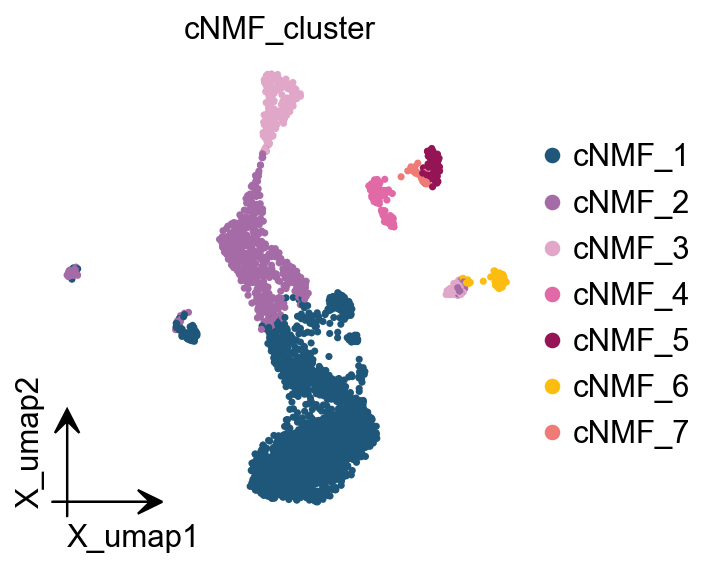

In [24]:
ov.pl.embedding(
    adata,
    basis="X_umap",
    color=['cNMF_cluster'],
    frameon='small',
    #title="Celltypes",
    #legend_loc='on data',
    legend_fontsize=14,
    legend_fontoutline=2,
    #size=10,
    #legend_loc=True, 
    add_outline=False, 
    #add_outline=True,
    outline_color='black',
    outline_width=1,
    show=False,
)

Here we are, proposing another idea of categorisation. We use cells with cNMF greater than 0.5 as a primitive class, and then train a random forest classification model, and then use the random forest classification model to classify cells with cNMF less than 0.5 to get a more accurate

In [25]:
cnmf_obj.get_results_rfc(adata,result_dict,
                         use_rep='scaled|original|X_pca',
                        cNMF_threshold=0.5)

Single Tree: 0.9905660377358491
Random Forest: 0.9952830188679245
cNMF_cluster_rfc is added to adata.obs
cNMF_cluster_clf is added to adata.obs


[<Axes: title={'center': 'cNMF_cluster_rfc'}, xlabel='X_umap1', ylabel='X_umap2'>,
 <Axes: title={'center': 'cNMF_cluster_clf'}, xlabel='X_umap1', ylabel='X_umap2'>]

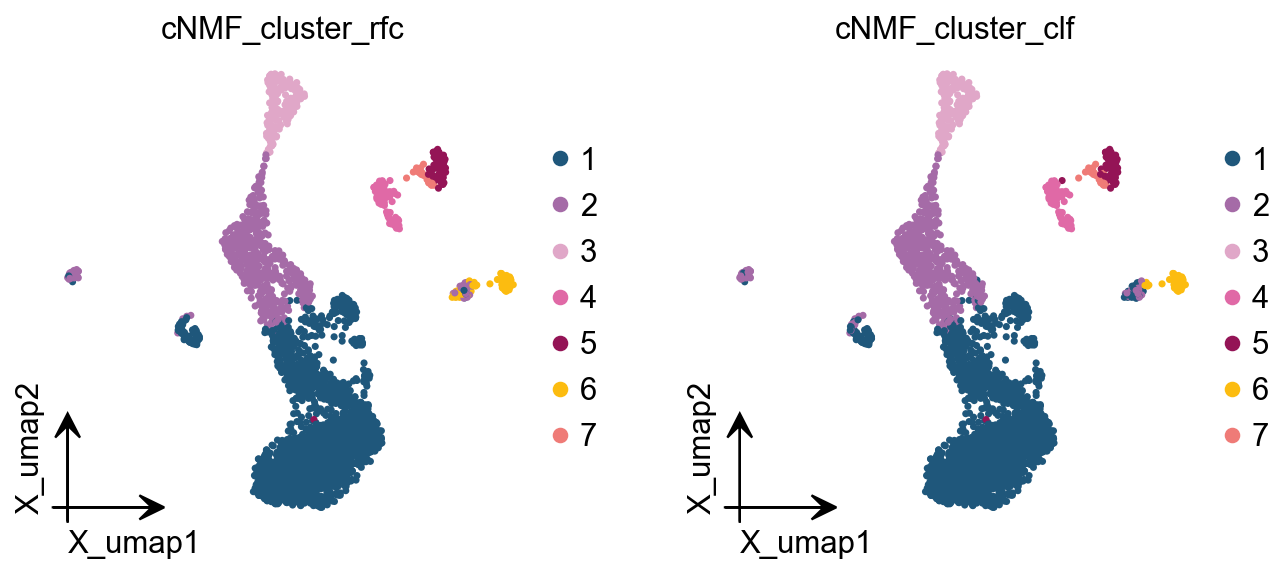

In [26]:
ov.pl.embedding(
    adata,
    basis="X_umap",
    color=['cNMF_cluster_rfc','cNMF_cluster_clf'],
    frameon='small',
    #title="Celltypes",
    #legend_loc='on data',
    legend_fontsize=14,
    legend_fontoutline=2,
    #size=10,
    #legend_loc=True, 
    add_outline=False, 
    #add_outline=True,
    outline_color='black',
    outline_width=1,
    show=False,
)

In [27]:
plot_genes=[]
for i in result_dict['top_genes'].columns:
    plot_genes+=result_dict['top_genes'][i][:3].values.reshape(-1).tolist()

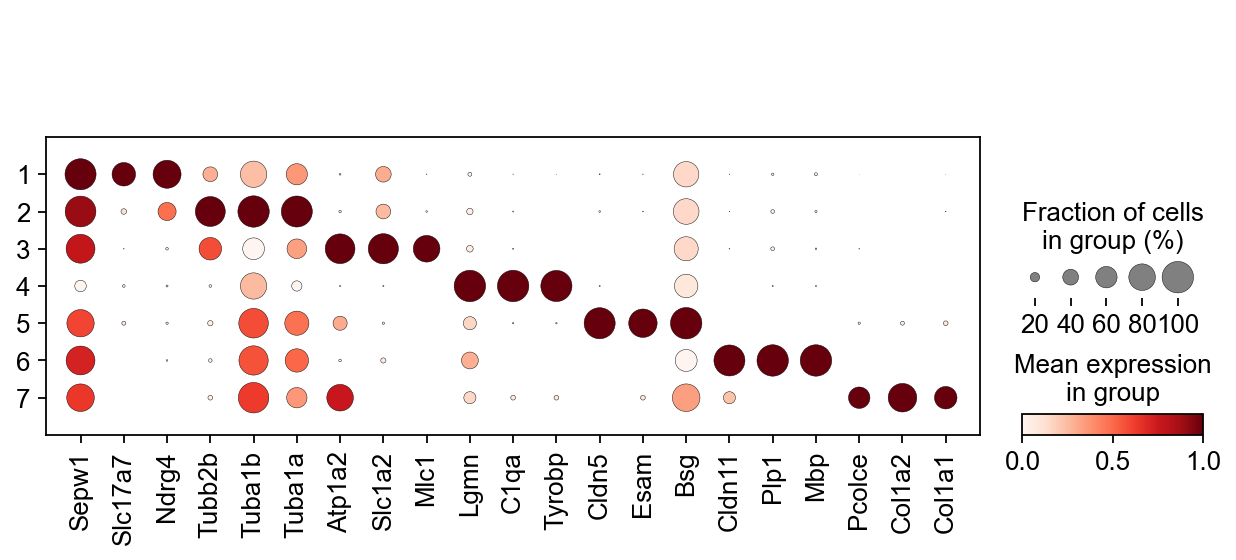

In [28]:
sc.pl.dotplot(adata,plot_genes, "cNMF_cluster_clf", dendrogram=False,standard_scale='var',)

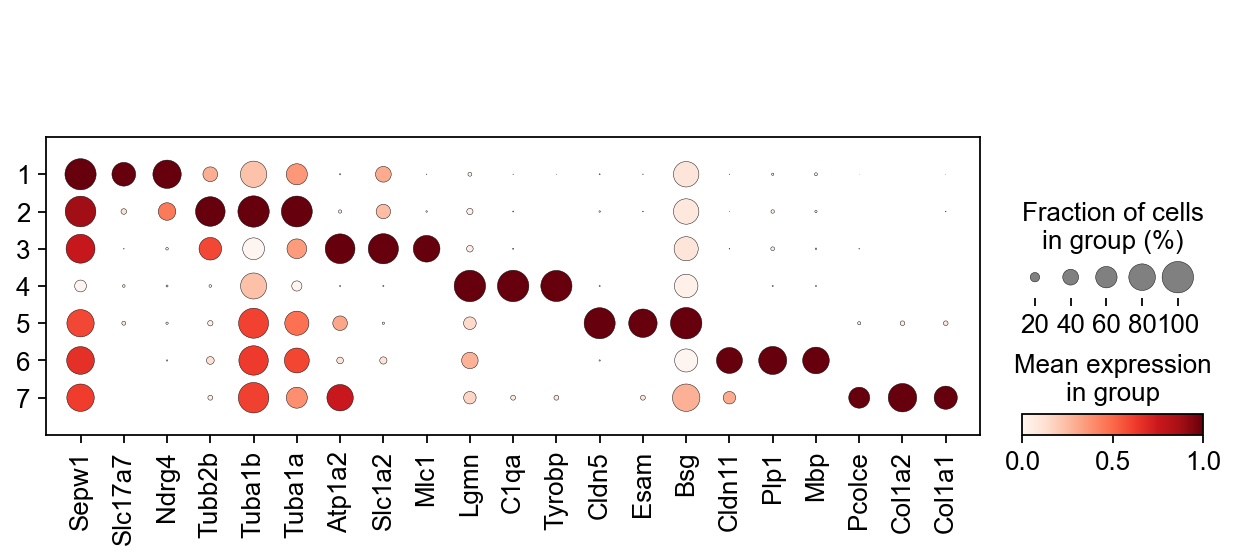

In [29]:
sc.pl.dotplot(adata,plot_genes, 'cNMF_cluster_rfc', dendrogram=False,standard_scale='var',)

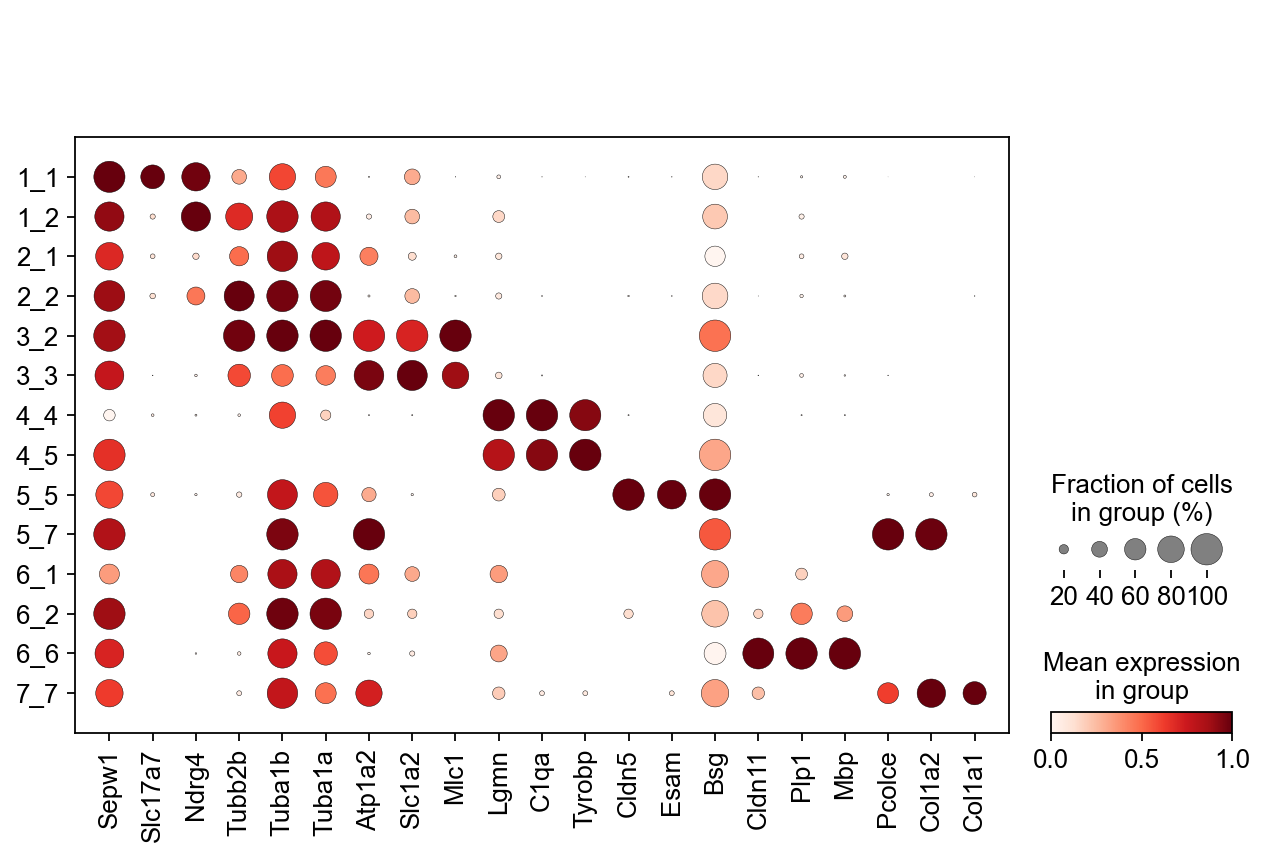

In [30]:
sc.pl.dotplot(adata,plot_genes, ['cNMF_cluster_rfc','cNMF_cluster_clf'], dendrogram=False,standard_scale='var',)